<a href="https://colab.research.google.com/github/jgibbons94/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

## DONE Study Examples

In the folders

[Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs](https://github.com/ganeshutah/Jove/blob/master/For_CS3100_Fall2020/17_DTMs_and_NDTMs/CH13-Asg8.ipynb)

and 

[Jove/For_CS3100_Fall2020/18_More_TM_Exs](https://github.com/ganeshutah/Jove/blob/master/For_CS3100_Fall2020/18_More_TM_Exs/More_TM_Exs.ipynb)

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## DONE Write a Summary

Describe what you learned about TMs of both varieties.

Both varieties of TM could be described as "awesome", "tedious", "powerful", and "taped together." A Turring machine consists of a theoretically infinite amount of tape divided into cells, a movable header on one of the cells of that tape, and a state. Turring proved that this structure could be used to solve any solvable problem. The Jove MarkDown language for NDTMs is the same as for DTMs. Jove uses fuel to guarantee TMs will eventually fail.

## DONE Create a DTM to Delete a Character

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


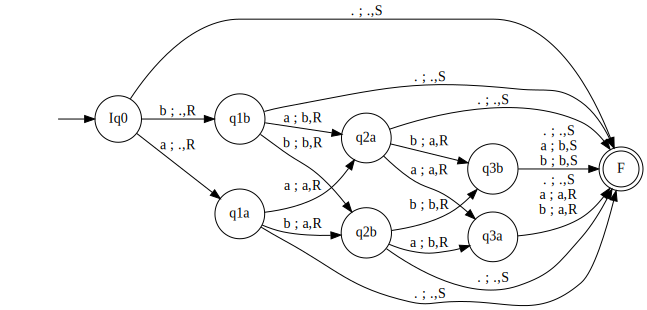

In [11]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! For strings length >=4, delete the fourth character, then shift first three
!! characters 1 cell right
!! For strings length <4, delete the last character, then shift entire remaining
!! string 1 cell right.
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

Iq0: a; ., R -> q1a
Iq0: b; ., R -> q1b
Iq0: .; ., S -> F

q1a: a; a, R-> q2a
q1a: b; a, R-> q2b
q1a: .; ., S->F

q1b: a; b, R-> q2a
q1b: b; b, R-> q2b
q1b: .; ., S->F

q2a: a; a, R-> q3a
q2a: b; a, R-> q3b
q2a: .; ., S->F

q2b: a; b, R-> q3a
q2b: b; b, R-> q3b
q2b: .; ., S->F

q3a: a; a, R->F
q3a: b; a, R->F
q3a: .; ., S->F

q3b: a; b, S->F
q3b: b; b, S->F
q3b: .; ., S->F


!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [12]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

## DONE Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


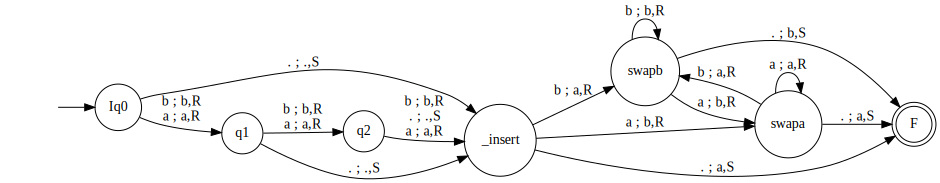

In [13]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! For strings length >=4, insert the inverse of the fourth character,
!! then copy each character 1 cell right
!! For strings length <4, insert 'a' at the end of the string.
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

Iq0: a; a, R -> q1
Iq0: b; b, R -> q1
Iq0: .; ., S -> _insert

q1: a; a, R -> q2
q1: b; b, R -> q2
q1: .; ., S -> _insert

q2: a; a, R -> _insert
q2: b; b, R -> _insert
q2: .; ., S -> _insert

_insert: a; b, R -> swapa
_insert: b; a, R -> swapb
_insert: .; a, S -> F

swapa: a; a, R-> swapa
swapa: b; a, R-> swapb
swapa: .; a, S-> F

swapb: a; b, R-> swapa
swapb: b; b, R-> swapb
swapb: .; b, S-> F






!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [14]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

## DONE Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

### Append Copy

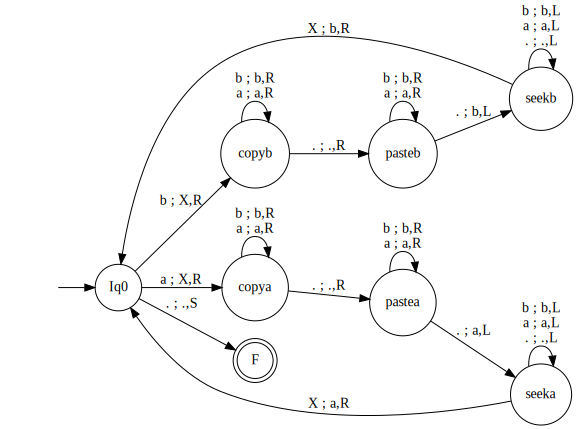

In [15]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! Copy a string.
!! For any string X on the tape, make the tape say X X
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

Iq0: a; X, R -> copya
Iq0: b; X, R -> copyb
Iq0: .; ., S -> F

copya: a; a, R-> copya
copya: b; b, R-> copya
copya: .; ., R-> pastea

copyb: a; a, R-> copyb
copyb: b; b, R-> copyb
copyb: .; ., R-> pasteb

pastea: a; a, R-> pastea
pastea: b; b, R-> pastea
pastea: .; a, L-> seeka

pasteb: a; a, R-> pasteb
pasteb: b; b, R-> pasteb
pasteb: .; b, L-> seekb

seeka: a; a, L-> seeka
seeka: b; b, L-> seeka
seeka: .; ., L-> seeka
seeka: X; a, R-> Iq0

seekb: a; a, L-> seekb
seekb: b; b, L-> seekb
seekb: .; ., L-> seekb
seekb: X; b, R-> Iq0



!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!---------------------------------------------------------------------------

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [16]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

### Prepend_copy

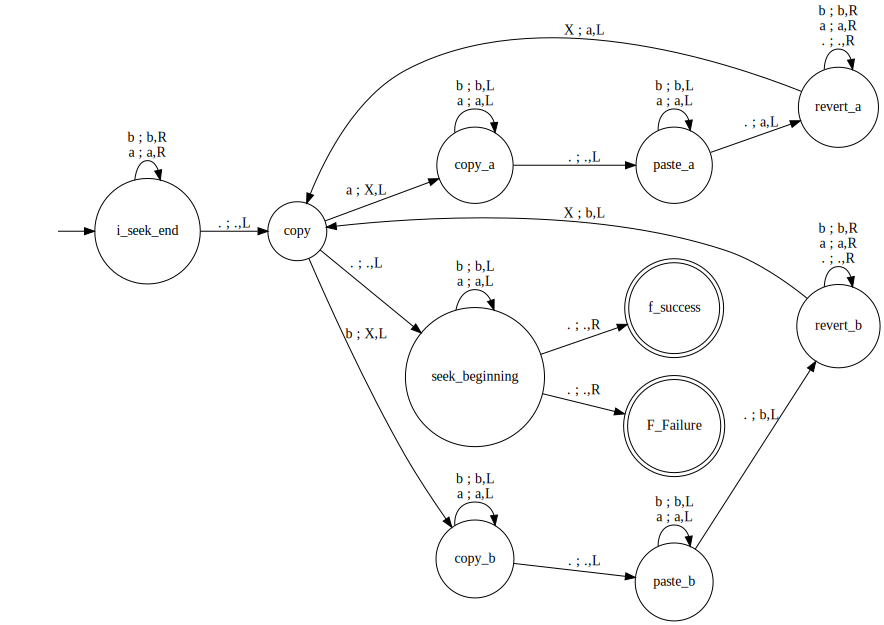

In [103]:
wpw_tm = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! Copy a string.
!! For any string X on the tape, make the tape say X X
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------
!!First three states: Iq0, q1, q2 do nothing.

i_seek_end: a; a, R-> i_seek_end
i_seek_end: b; b, R-> i_seek_end
i_seek_end: .; ., L-> copy

copy: a; X, L -> copy_a
copy: b; X, L -> copy_b
copy: .; ., L-> seek_beginning

copy_a: a; a, L-> copy_a
copy_a: b; b, L-> copy_a
copy_a: .; ., L-> paste_a

copy_b: a; a, L-> copy_b
copy_b: b; b, L-> copy_b
copy_b: .; ., L-> paste_b


paste_a: a; a, L-> paste_a
paste_a: b; b, L-> paste_a
paste_a: .; a, L-> revert_a

paste_b: a; a, L-> paste_b
paste_b: b; b, L-> paste_b
paste_b: .; b, L-> revert_b

revert_a: a; a, R->revert_a
revert_a: b; b, R->revert_a
revert_a: .; ., R->revert_a
revert_a: X; a, L->copy

revert_b: a; a, R->revert_b
revert_b: b; b, R->revert_b
revert_b: .; ., R->revert_b
revert_b: X; b, L->copy

seek_beginning: a; a, L->seek_beginning
seek_beginning: b; b, L->seek_beginning
seek_beginning: .; ., R-> f_success

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [104]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

## DONE Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [17]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [18]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


## DONE Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


### Machine on page 202

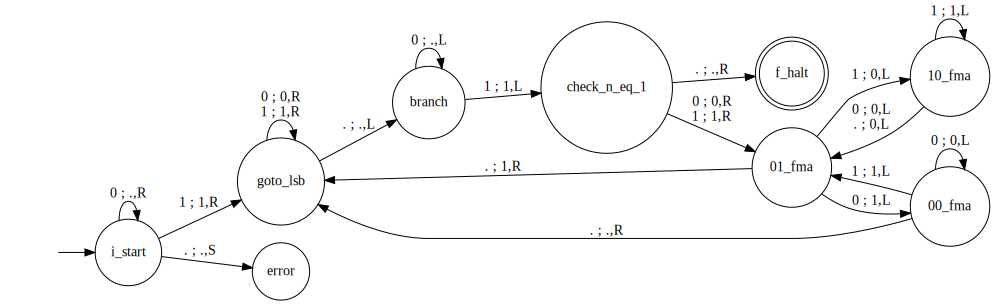

In [82]:
wpw_tm = md2mc(
'''
TM !!
i_start : 0; ., R -> i_start !! erase this zero and try to find more
i_start : 1; 1, R -> goto_lsb !! we have a proper number, go to the lsb
i_start : .; ., S -> error !! error on no input or input == 0
goto_lsb : 0; 0,R | 1; 1,R -> goto_lsb !! scan off the right edge of the number
goto_lsb : .; .,L -> branch !! take a step back to be on the lsb and start branch
branch : 0; .,L -> branch !! number is even, divide by two and re-branch
branch : 1; 1,L -> check_n_eq_1 !! number is odd, check if it is 1
check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma !! number wasn't 1, goto 3n+1
check_n_eq_1 : .; .,R -> f_halt !! number was 1, halt
!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma : 0; 0,L -> 00_fma
!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma : 1; 1,L -> 01_fma
!! reached the end of the number, go back to the start
00_fma : .; .,R -> goto_lsb
!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma : 0; 1,L -> 00_fma
!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma : 1; 0,L -> 10_fma
!! reached the end of the number, write our 1 and go back to the start
01_fma : .; 1,R -> goto_lsb
!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma : 0; 0,L -> 01_fma
!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma : 1; 1,L -> 10_fma
!! reached the end of the number, write a 0 from our 10 and carry 1
10_fma : .; 0,L -> 01_fma
'''   
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [83]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

### First attempt: failure

I tried it with the "append copy" algorithm and came up with two problems.
- When I had it work on the second string, it would overflow 
into the first string
- When I had it work on the first string, the copy would overflow into the second string.
I thought I would try a machine that works on the second string and inserts a blank when it comes to a blank, but I thought it would run out of fuel. 1000 isn't very much.

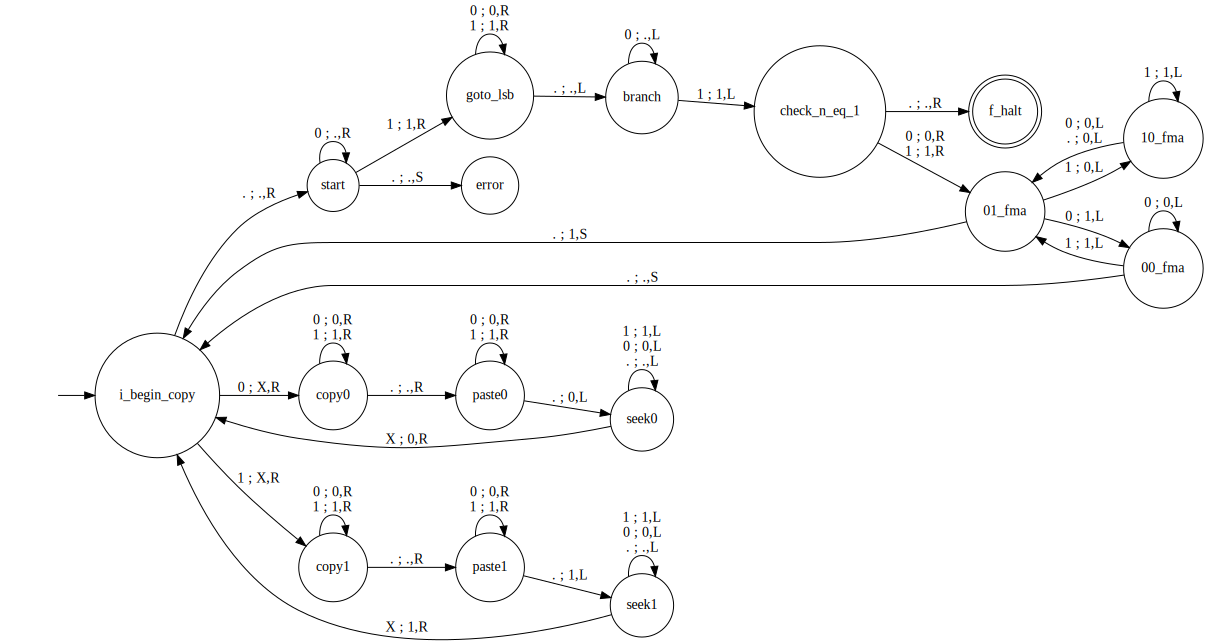

In [66]:
wpw_tm = md2mc(
'''
TM !!
start : 0; ., R -> start !! erase this zero and try to find more
start : 1; 1, R -> goto_lsb !! we have a proper number, go to the lsb
start : .; ., S -> error !! error on no input or input == 0
goto_lsb : 0; 0,R | 1; 1,R -> goto_lsb !! scan off the right edge of the number
goto_lsb : .; .,L -> branch !! take a step back to be on the lsb and start branch
branch : 0; .,L -> branch !! number is even, divide by two and re-branch
branch : 1; 1,L -> check_n_eq_1 !! number is odd, check if it is 1
check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma !! number wasn't 1, goto 3n+1
check_n_eq_1 : .; .,R -> f_halt !! number was 1, halt
!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma : 0; 0,L -> 00_fma
!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma : 1; 1,L -> 01_fma
!! reached the end of the number, go back to the start
00_fma : .; .,S-> i_begin_copy!!L -> i_begin_copy
!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma : 0; 1,L -> 00_fma
!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma : 1; 0,L -> 10_fma
!! reached the end of the number, write our 1 and go back to the start
01_fma : .; 1,S->i_begin_copy!!R -> i_begin_copy
!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma : 0; 0,L -> 01_fma
!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma : 1; 1,L -> 10_fma
!! reached the end of the number, write a 0 from our 10 and carry 1
10_fma : .; 0,L -> 01_fma

!!seek_beginning : 0; 0, L-> seek_beginning
!!seek_beginning : 1; 1, L-> seek_beginning
!!seek_beginning : .; ., R-> start

!!seek_end : 0; 0, R -> seek_end
!!seek_end : 1; 1, R -> seek_end
!!seek_end : .; ., L -> copy



i_begin_copy: 1; X, R -> copy1
i_begin_copy: 0; X, R -> copy0
i_begin_copy: .; ., R->start !! L-> start !! seek_beginning

copy1: 1; 1, R-> copy1
copy1: 0; 0, R-> copy1
copy1: .; ., R-> paste1

copy0: 1; 1, R-> copy0
copy0: 0; 0, R-> copy0
copy0: .; ., R-> paste0

paste1: 1; 1, R-> paste1
paste1: 0; 0, R-> paste1
paste1: .; 1, L-> seek1

paste0: 1; 1, R-> paste0
paste0: 0; 0, R-> paste0
paste0: .; 0, L-> seek0

seek1: 1; 1, L-> seek1
seek1: 0; 0, L-> seek1
seek1: .; ., L-> seek1
seek1: X; 1, R-> i_begin_copy

seek0: 1; 1, L-> seek0
seek0: 0; 0, L-> seek0
seek0: .; ., L-> seek0
seek0: X; 0, R-> i_begin_copy

insert_blank: .; ., L -> insert_blank
insert_blank: 0; ., L -> L0
insert_blank: 1; ., L -> L1

L0 : 0; 0, L -> L0
L0 : 1; 0, L -> L1
L0 : .; 0, S -> seek_end

L1 : 0; 1, L -> L0
L1 : 1; 1, L -> L1
L1 : .; 1, S -> seek_end


seek_end : 0; 0, R-> seek_end
seek_end : 1; 1, R-> seek_end
seek_end : .; ., R-> start






'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [67]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

###Second attempt:

Unlike the specification, this Turring Machine should trace out from left to right, e.g. 

$1*10*100*1000*10000*101*1010*11$

where $* \in \varepsilon{}^{*}$


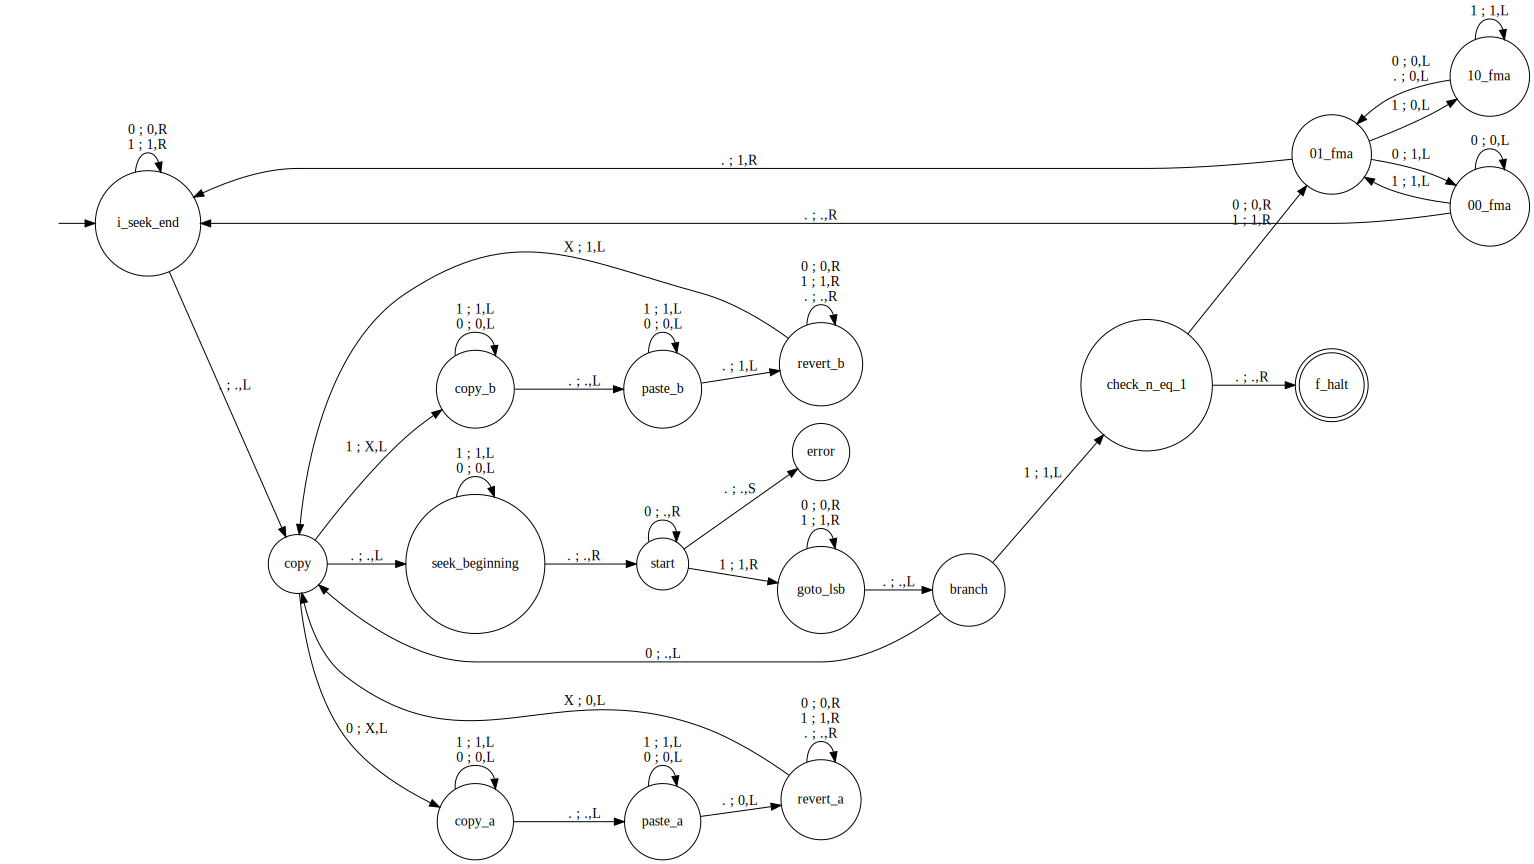

In [101]:
wpw_tm = md2mc(
'''
TM !!
start : 0; ., R -> start !! erase this zero and try to find more
start : 1; 1, R -> goto_lsb !! we have a proper number, go to the lsb
start : .; ., S -> error !! error on no input or input == 0
goto_lsb : 0; 0,R | 1; 1,R -> goto_lsb !! scan off the right edge of the number
goto_lsb : .; .,L -> branch !! take a step back to be on the lsb and start branch
branch : 0; .,L -> copy !! branch !! number is even, divide by two and re-branch
branch : 1; 1,L -> check_n_eq_1 !! number is odd, check if it is 1
check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma !! number wasn't 1, goto 3n+1
check_n_eq_1 : .; .,R -> f_halt !! number was 1, halt
!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma : 0; 0,L -> 00_fma
!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma : 1; 1,L -> 01_fma
!! reached the end of the number, go back to the start
00_fma : .; .,R->i_seek_end !!R -> goto_lsb
!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma : 0; 1,L -> 00_fma
!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma : 1; 0,L -> 10_fma
!! reached the end of the number, write our 1 and go back to the start
01_fma : .; 1,R->i_seek_end !!R -> goto_lsb
!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma : 0; 0,L -> 01_fma
!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma : 1; 1,L -> 10_fma
!! reached the end of the number, write a 0 from our 10 and carry 1
10_fma : .; 0,L -> 01_fma


i_seek_end: 0; 0, R-> i_seek_end
i_seek_end: 1; 1, R-> i_seek_end
i_seek_end: .; ., L-> copy

copy: 0; X, L -> copy_a
copy: 1; X, L -> copy_b
copy: .; ., L-> seek_beginning

copy_a: 0; 0, L-> copy_a
copy_a: 1; 1, L-> copy_a
copy_a: .; ., L-> paste_a

copy_b: 0; 0, L-> copy_b
copy_b: 1; 1, L-> copy_b
copy_b: .; ., L-> paste_b


paste_a: 0; 0, L-> paste_a
paste_a: 1; 1, L-> paste_a
paste_a: .; 0, L-> revert_a

paste_b: 0; 0, L-> paste_b
paste_b: 1; 1, L-> paste_b
paste_b: .; 1, L-> revert_b

revert_a: 0; 0, R->revert_a
revert_a: 1; 1, R->revert_a
revert_a: .; ., R->revert_a
revert_a: X; 0, L->copy

revert_b: 0; 0, R->revert_b
revert_b: 1; 1, R->revert_b
revert_b: .; ., R->revert_b
revert_b: X; 1, L->copy

seek_beginning: 0; 0, L->seek_beginning
seek_beginning: 1; 1, L->seek_beginning
seek_beginning: .; ., R-> start

'''   
    
)

dotObj_tm(wpw_tm, FuseEdges = True)


In [102]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True, show_rejected=True)

I would work on improving this if I had not run out of time.